In [1]:
# Check if platipy is installed, if not install it.
try:
    import platipy
except:
    !pip install git+https://github.com/pyplati/platipy.git
    import platipy

# The ImageVisualiser clas
from platipy.imaging import ImageVisualiser

# Function to grab some test data
from platipy.imaging.tests.data import get_lung_nifti

# Usual suspects
import numpy as np
import SimpleITK as sitk
from pathlib import Path
import matplotlib.pyplot as plt

# Some utilities we use for generating interesting data
from platipy.imaging.registration.utils import convert_mask_to_reg_structure, apply_transform
from platipy.imaging.registration.deformable import fast_symmetric_forces_demons_registration
from platipy.imaging.generation.dvf import generate_field_asymmetric_extend
from platipy.imaging.label.utils import get_com
from platipy.imaging.utils.crop import label_to_roi

In [2]:
input_directory = get_lung_nifti()

In [3]:
pat_directory = input_directory.joinpath("LCTSC-Test-S1-101")

# Read in the CT image
ct_filename = next(pat_directory.glob("**/IMAGES/*.nii.gz"))
ct_image = sitk.ReadImage(ct_filename.as_posix())

# Read in the RTStruct contours as binary masks
contour_filename_list = list(pat_directory.glob("**/STRUCTURES/*.nii.gz"))

contours = {}
for contour_filename in contour_filename_list:
    _name = contour_filename.name.split(".nii.gz")[0].split("RTSTRUCT_")[-1]
    
    contours[_name] = sitk.ReadImage(contour_filename.as_posix())

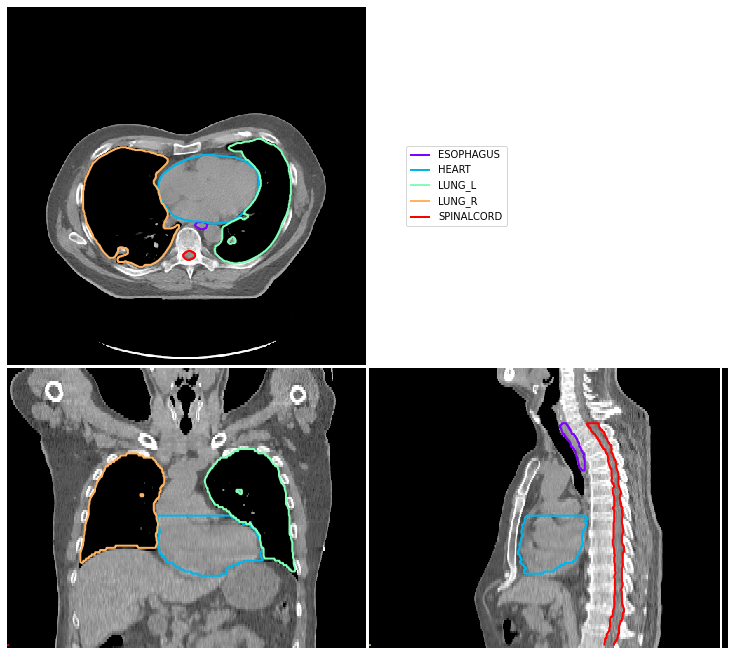

In [4]:
image_visualiser = ImageVisualiser(ct_image, cut=(50,256,256))
image_visualiser.add_contour(contours)
fig = image_visualiser.show()

In [5]:
contours["HEART_EXPAND"], tfm_expansion, dvf_expansion = generate_field_asymmetric_extend(contours["HEART"])

In [6]:
ct_image_deformed = apply_transform(
    input_image=ct_image,
    reference_image=None,
    transform=tfm_expansion,
    default_value=-1000,
    interpolator=sitk.sitkBSpline,
)

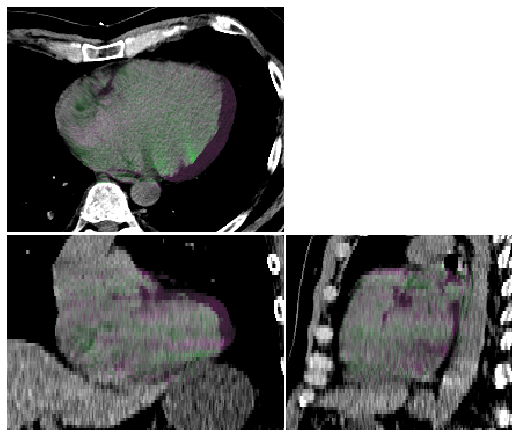

In [7]:
image_visualiser = ImageVisualiser(ct_image, cut=get_com(contours["HEART"]), figure_size_in=7, window=(-40, 200))

image_visualiser.add_comparison_overlay(ct_image_deformed)

image_visualiser.set_limits_from_label(contours["HEART_EXPAND"], expansion=40)

fig = image_visualiser.show()

In [8]:
contours["HEART"]

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x000002585ECAE810> >

In [9]:
contours["HEART_EXPAND"]

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x00000258006746C0> >

In [10]:
input_directory

WindowsPath('data/nifti/lung')